# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [3]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


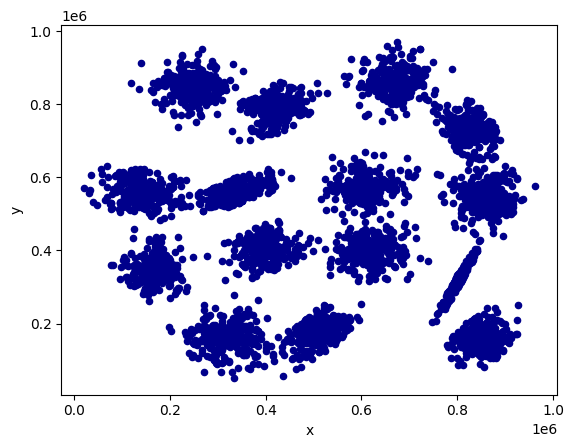

In [4]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='DarkBlue')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

In [5]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas
from sklearn.cluster import KMeans

# dengan Silhoutte score
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,8)

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters, random_state=42)
  preds = clusterer.fit_predict(data)

  score = silhouette_score(data, preds)
  print("For the {} cluster, the silhoutte score is {}".format(n_clusters, score))

For the 2 cluster, the silhoutte score is 0.3921542107435631
For the 3 cluster, the silhoutte score is 0.41529477430840245
For the 4 cluster, the silhoutte score is 0.44523116293878723
For the 5 cluster, the silhoutte score is 0.46392568634109593
For the 6 cluster, the silhoutte score is 0.4988997481278877
For the 7 cluster, the silhoutte score is 0.5276924216832588


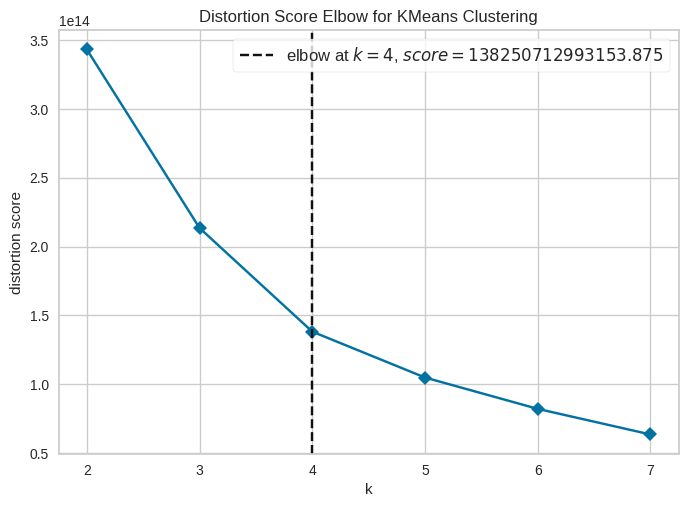

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=7, random_state=42), k=(2, 8),
                 timings=False)

In [6]:
# menggunakan K-elbow visualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import intercluster_distance
kelbow_visualizer(KMeans(random_state=42),
                  data,
                  k=(2, 8),
                  timings=False)

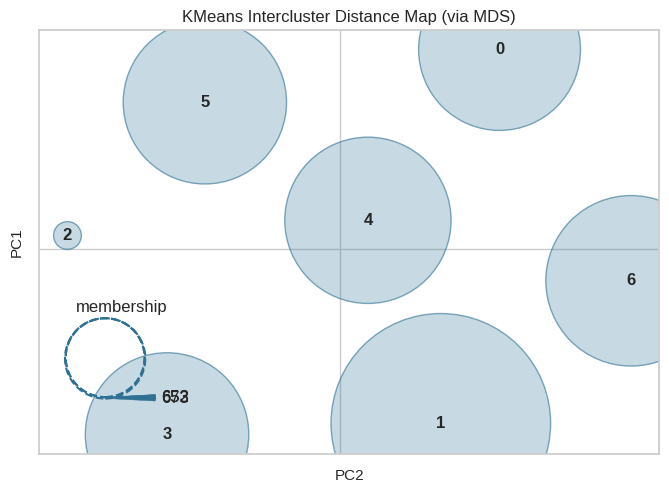

InterclusterDistance(ax=<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=7, random_state=42),
                     random_state=42)

In [7]:
# intercluster_distance for k=7 for n_clusters berdasarkan silhoutte score
intercluster_distance(KMeans(n_clusters=7, random_state=42),
                      data,
                      embedding='mds',
                      random_state=42) # other option for embedding 'tsne'

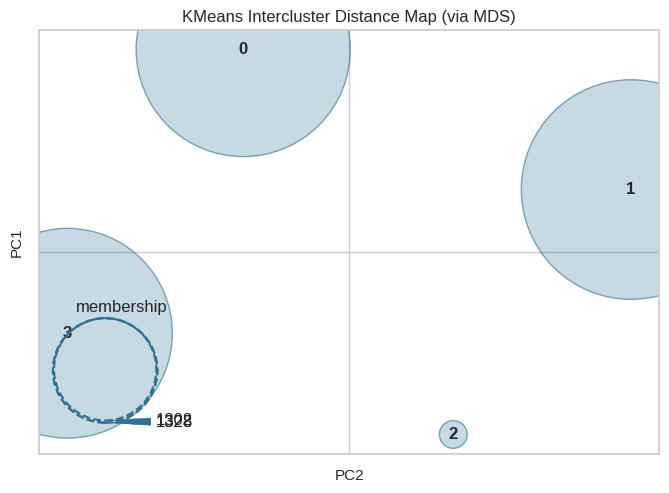

InterclusterDistance(ax=<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=42),
                     random_state=42)

In [8]:
# intercluster_distance for k=4 for n_clusters berdasarkan elbow method
intercluster_distance(KMeans(n_clusters=4, random_state=42),
                      data,
                      embedding='mds',
                      random_state=42) # other option for embedding 'tsne'

In [9]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=7, random_state=42)

## Proses Visualisasi hasil CLuster berdasarkan silhouette score

In [10]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data
# Menggabungkan label hasil clustering ke dalam data
data['cluster'] = kmeans.labels_

# Menampilkan data dengan label cluster
data.head()

,x,y,cluster
0,664159,550946,4
1,665845,557965,4
2,597173,575538,4
3,618600,551446,4
4,635690,608046,4


In [11]:
data['cluster'].value_counts()

1    1297
6     705
4     673
3     653
5     652
0     642
2     378
Name: cluster, dtype: int64

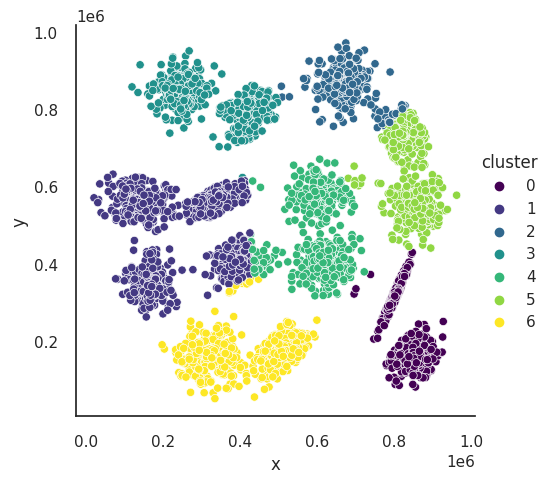

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan library seaborn untuk plotting
sns.set(style="white")

# Melakukan plot dengan seaborn relplot
sns.relplot(x="x", y="y", hue="cluster", data=data, palette="viridis")

# Menampilkan plot
plt.show()


## Proses Visualisasi hasil CLuster berdasarkan elbow method

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=4, random_state=42)

In [14]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data
# Menggabungkan label hasil clustering ke dalam data
data['cluster'] = kmeans.labels_

# Menampilkan data dengan label cluster
data.head()

,x,y,cluster
0,664159,550946,3
1,665845,557965,3
2,597173,575538,3
3,618600,551446,3
4,635690,608046,3


In [15]:
data['cluster'].value_counts()

1    1362
0    1328
3    1302
2    1008
Name: cluster, dtype: int64

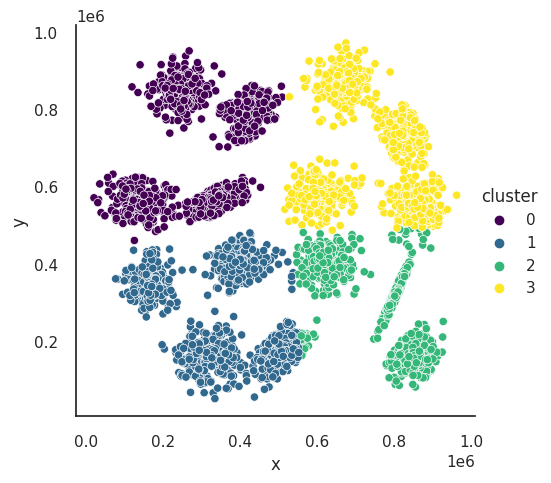

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan library seaborn untuk plotting
sns.set(style="white")

# Melakukan plot dengan seaborn relplot
sns.relplot(x="x", y="y", hue="cluster", data=data, palette="viridis")

# Menampilkan plot
plt.show()


* Berdasarkan nilai Silhoutte, disarankan K=7 untuk jumlah k yang terbaik (kami tidak menggunakan K=2 karena akan menghasilkan cluster yang umum). dengan range (2-8).
* Berdasarkan visualisator K-elbow, disarankan K=4 untuk jumlah k terbaik. dengan range (2-8).
